In [195]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

from sklearn.metrics import f1_score , confusion_matrix, precision_recall_curve, precision_recall_fscore_support

In [169]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

In [170]:
df_train = pd.read_csv('../input/mnist_train.csv')
df_test = pd.read_csv('../input/mnist_test.csv')

In [55]:
for var in (df_test, df_train): print(var.shape)

(10000, 785)
(60000, 785)


In [40]:
#for var in (df_test, df_train): print(var.shape)
#df_train.head() 
#for var in (df_test, df_train): print(var.hist('label'))
#df_train.columns

In [171]:
x_train = df_train.iloc[:,1:]
x_test = df_test.iloc[:,1:]

y_train = df_train.iloc[:,0]
y_test = df_test.iloc[:,0]

In [78]:
for var in (x_train, x_test, y_train, y_test): 
    print("*"*80)
    print(namestr(var, globals()),"\n")
    print(var.shape)
    print("-"*50)
    print(var.head())

********************************************************************************
['var', 'x_train'] 

(60000, 784)
--------------------------------------------------
   1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...    28x19  28x20  \
0    0    0    0    0    0    0    0    0    0     0  ...        0      0   
1    0    0    0    0    0    0    0    0    0     0  ...        0      0   
2    0    0    0    0    0    0    0    0    0     0  ...        0      0   
3    0    0    0    0    0    0    0    0    0     0  ...        0      0   
4    0    0    0    0    0    0    0    0    0     0  ...        0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 

# Decision Tree

In [172]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [83]:
dt.score(x_test,y_test)

0.8791

In [85]:
dt.score(x_train,y_train)

1.0

# Random Forrest

In [108]:
rf = RandomForestClassifier(n_estimators=20)

rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [174]:
print(rf.score(x_test,y_test))
print(rf.score(x_train, y_train))

0.9593
0.9999


In [175]:
y_train_pred_rf = rf.predict(x_train)

# Bagging

### 1*

In [95]:
bg = BaggingClassifier()

bg.fit(x_train,y_train)

In [97]:
print(bg.score(x_test,y_test))
print(bg.score(x_train, y_train))

0.9445
0.9986166666666667


In [98]:
bg.base_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 2*

In [ ]:
bg2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5, max_features=1.0, n_estimators=20)

bg2.fit(x_train,y_train)

In [97]:
print(bg2.score(x_test,y_test))
print(bg2.score(x_train, y_train))

0.9445
0.9986166666666667


# Boosting

## Ada boost

In [106]:
adb = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5, learning_rate=1)

In [107]:
adb.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=5, random_state=None)

In [110]:
print("Score test:", adb.score(x_test,y_test))
print("Score train:", adb.score(x_train, y_train))

Score test: 0.8785
Score train: 1.0


# Voting 

In [113]:
lr = LogisticRegression()
dt2 = DecisionTreeClassifier()
svm = SVC(kernel='poly', degree = 2)

In [116]:
evc = VotingClassifier(estimators=[('lr',lr),('dt2',dt2),('svm',svm)], voting='hard')

In [117]:
evc.fit(x_train.iloc[:4000],y_train.iloc[:4000])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('dt2', Decisio...y', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [119]:
evc.get_params()

{'estimators': [('lr',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
             intercept_scaling=1, max_iter=100, multi_class='warn',
             n_jobs=None, penalty='l2', random_state=None, solver='warn',
             tol=0.0001, verbose=0, warm_start=False)),
  ('dt2',
   DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, presort=False, random_state=None,
               splitter='best')),
  ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
     kernel='poly', max_iter=-1, probability=False, random_state=None,
     shrinking=True, tol=0.001, verbose=False))],
 'flatten_transform': None,
 'n_jobs': None,
 'voting': 'har

In [121]:
print("Score test:", evc.score(x_test,y_test))

Score test: 0.9047
Score train: 0.9091666666666667


In [188]:
np.unique(y_train_pred_rf, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([5923, 6743, 5957, 6130, 5843, 5421, 5918, 6267, 5850, 5948]))

# Evaluation metrics 

In [189]:
confusion_matrix(y_train,y_train_pred_rf)

array([[5923,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6742,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5957,    0,    0,    0,    0,    1,    0,    0],
       [   0,    0,    0, 6130,    0,    0,    0,    0,    0,    1],
       [   0,    0,    0,    0, 5841,    0,    0,    1,    0,    0],
       [   0,    0,    0,    0,    0, 5421,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5918,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6265,    0,    0],
       [   0,    1,    0,    0,    0,    0,    0,    0, 5850,    0],
       [   0,    0,    0,    0,    2,    0,    0,    0,    0, 5947]])

In [202]:
f1_score(y_train, y_train_pred_rf, average='macro')

0.9999006398244188

In [193]:
# for two classes only 
##precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred_rf)

# Displaying data images 

In [156]:
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt

In [228]:
n = 120

2

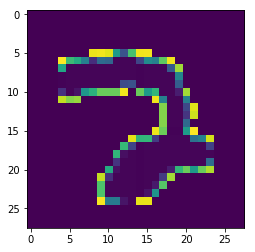

In [229]:
a = df_train.iloc[n,1:].values

gen_image(a)

df_train.iloc[n,0]